We study how to do LSTM in tensorflow next

# LSTM

When you have the time, go over [this excellent post](https://r2rt.com/recurrent-neural-networks-in-tensorflow-ii.html).

As before the goal is to create a simple one for deducing the next digit in the sequence 0,0,1,0,0,1,0,0,1,0,0,1,...

In [1]:
import tensorflow as tf
import numpy as np

The difference now, is that we are going to use LSTM and dynamic RNN

## Dynamic ones and most basic LSTM

As dar as I understand this method (dynamic) is faster, (don't really know why though). Another advantage is that the dynamic 'unrolling' allows to input tensors instead of list. 

If takes two kinds of tensors, depending on a hyperparameter called time_major == False (default) in this case the input should be of the form

`[batch_size, max_time, cell.output_size]`

if  time_major == True, then it should be of the form 

`[max_time, batch_size, cell.output_size]`

Where here `max_time` represents the 'unroll' size. 

As in the previous case we have the data given by 

In [2]:
X_data = [[[0],[0],[1],[0]],[[0],[1],[0],[0]],[[1],[0],[0],[1]]]
y_data= [[[-1],[1],[-1],[-1]],[[1],[-1],[-1],[1]],[[-1],[-1],[1],[-1]]]
X_data=np.array(X_data)
y_data=np.array(y_data)

as we are going with the default we create some placeholders 

In [3]:
X = tf.placeholder(shape=(3,4,1),dtype=tf.float32)
y = tf.placeholder(shape=(3,4,1),dtype=tf.float32)

We use  tf.contrib.rnn.LSTMCell(1) as our LSTM cell, this follows the architecture found [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

So let's crete a simple cell and let's have just one unit so we don't have to process the output further (this is also the state size).

In [4]:
cell = tf.contrib.rnn.LSTMCell(1)

and we create the rnn layer now

In [5]:
output,_= tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

We now should train this, we first compute the loss

In [6]:
loss = tf.reduce_sum(tf.square(output-y))

and use our favorite gradient descent optimizer

In [7]:
optimizer = tf.train.AdamOptimizer().minimize(loss)

we are ready to run a session

In [8]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [9]:
losses=[]
for i in range(10000):
        loss_,_=sess.run([loss,optimizer],feed_dict={X:X_data,y:y_data})
        losses+=[loss_]

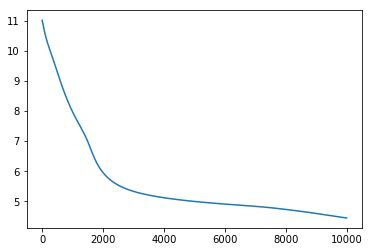

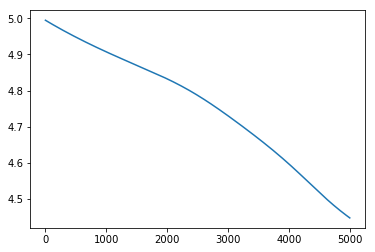

In [10]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()
plt.plot(losses[5000:])
plt.show()

In [11]:
A=sess.run(output,feed_dict={X:X_data,y:y_data})

Note that the result has a different shape

In [12]:
A.shape 

(3, 4, 1)

In [13]:
# [[0],[0],[1],[0]] should give [[-1],[1],[-1],[-1]]
# [[0],[1],[0],[0]] should give [[1],[-1],[-1],[1]]
# [[1],[0],[0],[1]] should give [[-1],[-1],[1],[-1]]
A

array([[[ 0.61159492],
        [ 0.52227437],
        [-0.75463444],
        [-0.49282873]],

       [[ 0.61159492],
        [-0.75014079],
        [-0.47098044],
        [ 0.55077934]],

       [[-0.7595942 ],
        [-0.51557499],
        [ 0.49293062],
        [-0.75555474]]], dtype=float32)

** Exercises:** 
- Make this better.
- Do the same with GRU, learn about GRU's.